In [499]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (12,7) #Tam de plots


df = pd.read_csv('../data/train.csv', low_memory=False, \
                    encoding = 'utf-8', index_col='id', parse_dates=['fecha'])

df.head(100)

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,...,23533.0,NaN,NaN,2015-08-23,0.0,0.0,0.0,0.0,0.0,2273000.0
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28,0.0,0.0,0.0,1.0,1.0,3600000.0
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,2.0,...,48551.0,NaN,NaN,2015-10-17,0.0,0.0,0.0,0.0,0.0,1200000.0
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09,0.0,0.0,0.0,1.0,1.0,650000.0
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,1.0,...,47835.0,NaN,NaN,2016-06-07,0.0,0.0,0.0,0.0,0.0,1150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257588,"hermosa casa de oportunidad en polanco, del. m...",4 recámaras \nsala \ncocina \ncomedor \n2 baño...,Casa,"Polanco III Sección, Miguel Hidalgo.",Miguel Hidalgo,Distrito Federal,5.0,4.0,2.0,2.0,...,275358.0,NaN,NaN,2014-12-17,0.0,0.0,0.0,1.0,1.0,2700000.0
11713,departamento en venta en comandante blanquet,<p>**propiedad de recuperaci&oacute;n bancaria...,Apartamento,"Calle Comandante Blanquet ,Col. Daniel Garza, ...",Miguel Hidalgo,Distrito Federal,25.0,2.0,1.0,1.0,...,24619.0,NaN,NaN,2013-08-08,0.0,0.0,0.0,0.0,0.0,430000.0
195709,hermosa cada en zona privada,hermosa casa en zona privada. se encuentra en ...,Casa,Privada de Geranios,Cuautitlán Izcalli,Edo. de México,5.0,3.0,2.0,2.0,...,56941.0,NaN,NaN,2016-12-31,0.0,1.0,0.0,1.0,1.0,2800000.0


In [500]:
#Rename columnas
df.rename(columns= {'tipodepropiedad' : 'tipo_de_propiedad','metroscubiertos': 'metros_cubiertos','metrostotales': 'metros_totales','usosmultiples':'usos_multiples'\
                    ,'escuelascercanas':'escuelas_cercanas','centroscomercialescercanos': 'centros_comerc_cercanos'}, inplace=True)

#Columna con anio
df['anio'] = df['fecha'].dt.year
#convierto pesos mexicanos a dolares con cambio actual
df['precio_dolar'] = df['precio'] / 19.57

In [501]:
df.columns

Index(['titulo', 'descripcion', 'tipo_de_propiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metros_cubiertos', 'metros_totales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usos_multiples', 'piscina', 'escuelas_cercanas',
       'centros_comerc_cercanos', 'precio', 'anio', 'precio_dolar'],
      dtype='object')

In [502]:
#01- Propuesta: 
#Con el paaso del tiempo las casas y departamentos fueron teniendo menos habitaciones?

deptos = df.loc[df['tipo_de_propiedad'] == 'Apartamento']
casas =  df.loc[df['tipo_de_propiedad'] == 'Casa']
deptos = deptos.groupby('anio').mean()
print("Anios y prom de hambientes por departamento")
deptos['habitaciones']




Anios y prom de hambientes por departamento


anio
2012    2.395200
2013    2.398969
2014    2.397653
2015    2.380892
2016    2.379506
Name: habitaciones, dtype: float64

In [503]:
casas =  casas.groupby('anio').mean()
print("Anios y prom de hambientes por casa")
casas.habitaciones

#es falso, no ocurrio. No tener en cuenta

Anios y prom de hambientes por casa


anio
2012    3.072496
2013    3.055676
2014    3.097378
2015    3.101189
2016    3.102558
Name: habitaciones, dtype: float64

## Histograma de precios (Casas y departamentos)

Text(0, 0.5, 'Frecuencia')

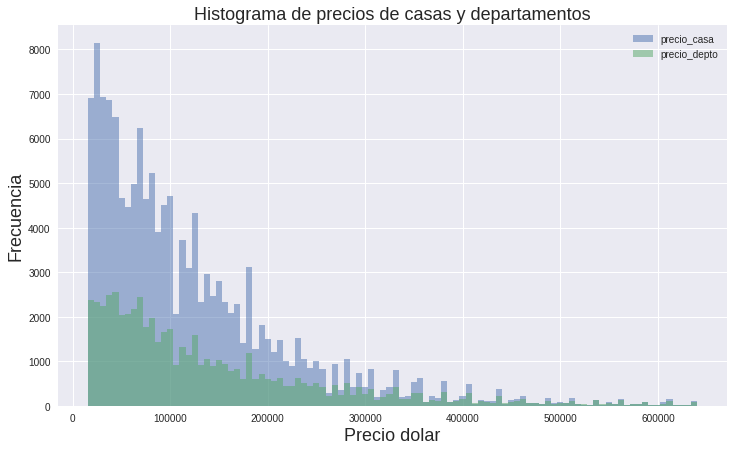

In [504]:
#03 - Histograma de precios en casas y apartamentos.
#Las mayores apariciones entran al rededor de los 25k$
#En casa


df2 = df
df2['precio_casa']= df.loc[df['tipo_de_propiedad']=='Casa']['precio_dolar']
df2['precio_depto'] = df.loc[df['tipo_de_propiedad']=='Apartamento']['precio_dolar']

                           

graf = df2[['precio_casa','precio_depto']].plot.hist(bins=100,alpha=0.5)


graf.set_title("Histograma de precios de casas y departamentos", fontsize=18)
graf.set_xlabel("Precio dolar",fontsize=18)
graf.set_ylabel("Frecuencia", fontsize=18)


# Relaciones entre cantiidad de propiedades por ciudad
## Cantidad de departamentos por ciudad

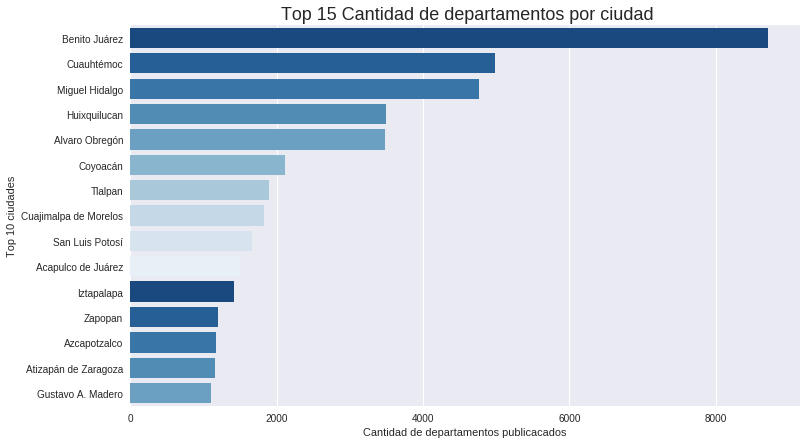

In [505]:
#04 Ciudades con mas cantidad de departamentos? 
depas = df.loc[df['tipo_de_propiedad']=="Apartamento"]['ciudad'].value_counts().head(15)
graf = sns.barplot(y=depas.index, x=depas.values, palette=sns.color_palette("Blues_r",10));
graf.set_title(' Top 15 Cantidad de departamentos por ciudad', fontsize=18);
graf.set_xlabel('Cantidad de departamentos publicacados');
graf.set_ylabel('Top 10 ciudades');
#benito juarez es una de las ciudades mas centricas, se puede notar que no aparece en el proximo plot de casas. Hay preponderancia de edificios.

## Cantidad de casas por ciudad

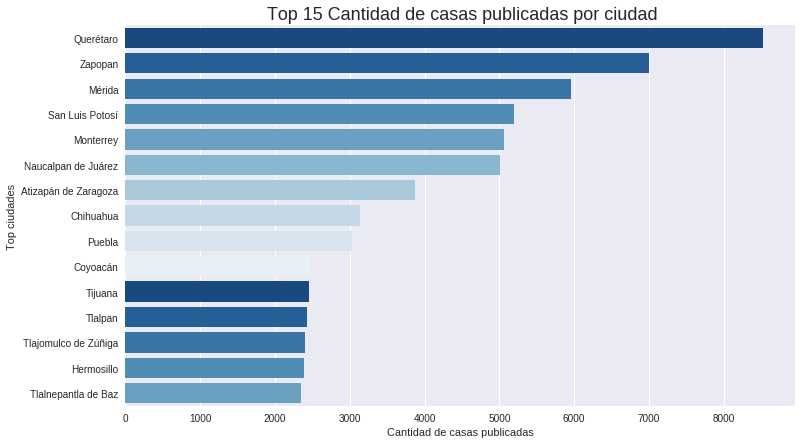

In [506]:
#05 Ciudad con mas cantidad de casas?
casas = df.loc[df['tipo_de_propiedad']=="Casa"]['ciudad'].value_counts().head(15)
graf = sns.barplot(y=casas.index, x=casas.values, palette=sns.color_palette("Blues_r",10));
graf.set_title(' Top 15 Cantidad de casas publicadas por ciudad', fontsize=18);
graf.set_xlabel('Cantidad de casas publicadas');
graf.set_ylabel('Top ciudades');

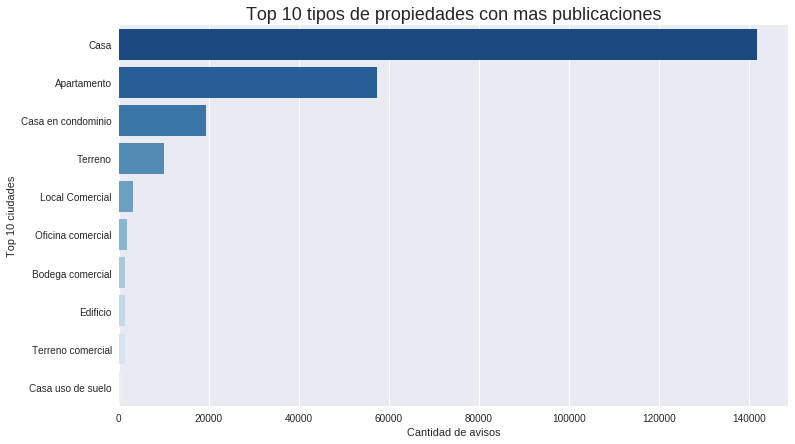

In [507]:
#06 Tipos de propiedades con mas publicaciones
prop = df['tipo_de_propiedad'].value_counts().head(10)

graf = sns.barplot(y=prop.index, x=prop.values, palette=sns.color_palette("Blues_r",10));
graf.set_title('Top 10 tipos de propiedades con mas publicaciones', fontsize=18);
graf.set_xlabel('Cantidad de avisos');
graf.set_ylabel('Top 10 ciudades');

In [508]:

df['tipo_de_propiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipo_de_propiedad, dtype: int64

# Analisis precio por mt2





## Ciudades mas caras  por mt2 cubiertos


In [509]:
#Quitarme los precios null!
df['precio_dolar'].isna().any()
df['precio_dolar'].isnull().any()
#Todo legal no hay null ni nan




False

## Top 10 ciudades mas caras

In [510]:
#Propiedades con mts2 null o nan
df_filtrado = df.dropna(subset=['metros_cubiertos'])
#df_filtrado.isna().sum()
#Tomo como criterio por lo menos tenga mas de 100 publicaciones -> para evitar 'la ecuacion'
df_filtrado = df_filtrado.groupby('ciudad').filter(lambda x: len(x)>100)
df_filtrado = df_filtrado.groupby('ciudad').agg({'precio_dolar':'mean','metros_cubiertos':'mean'})
df_filtrado['precio_mt2'] = df_filtrado['precio_dolar'].divide(df_filtrado['metros_cubiertos'])
datos = df_filtrado['precio_mt2']
datos_g = datos.sort_values(ascending = False).head(15)
datos_g

ciudad
Miguel Hidalgo            1585.910680
San Pedro Garza García    1415.807054
Cuauhtémoc                1380.675761
Benito Juárez             1324.295495
Cuajimalpa de Morelos     1239.354868
Alvaro Obregón            1206.990829
Huixquilucan              1115.076854
La Magdalena Contreras     995.799849
Coyoacán                   962.268325
Valle de Bravo             928.025343
Tlalpan                    899.228969
Acapulco de Juárez         831.738679
Naucalpan de Juárez        830.609587
Zihuatanejo de Azueta      811.985803
Solidaridad                810.944737
Name: precio_mt2, dtype: float64

Text(0, 0.5, 'Top 10 ciudades')

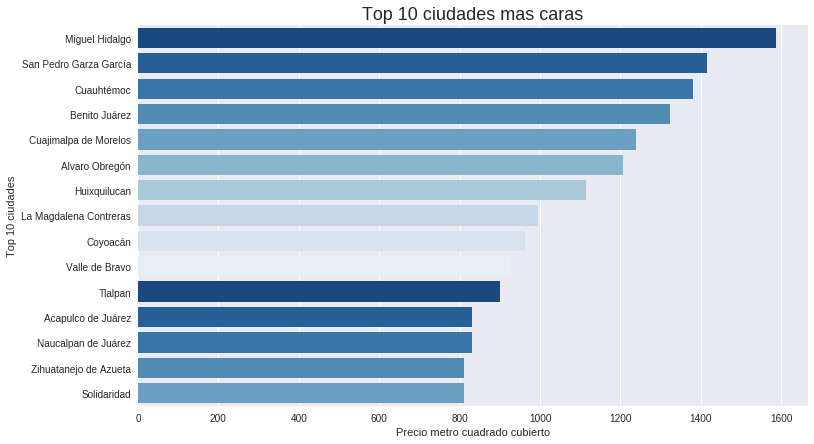

In [511]:
graf = sns.barplot(y=datos_g.index, x=datos_g.values, palette=sns.color_palette("Blues_r",10))
graf.set_title('Top 10 ciudades mas caras', fontsize=18);
graf.set_xlabel('Precio metro cuadrado cubierto')
graf.set_ylabel('Top 10 ciudades')


## Top 10 ciudades mas baratas

Text(0, 0.5, 'Top 10 ciudades')

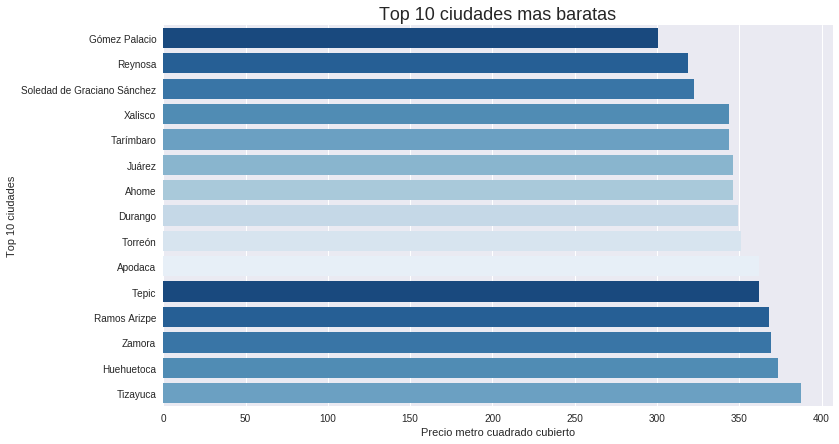

In [512]:
#Ciudades mas baratas
datos_g = datos.sort_values(ascending = True).head(15)
graf = sns.barplot(y=datos_g.index, x=datos_g.values, palette=sns.color_palette("Blues_r",10))
graf.set_title('Top 10 ciudades mas baratas', fontsize=18);
graf.set_xlabel('Precio metro cuadrado cubierto')
graf.set_ylabel('Top 10 ciudades')

## Analisis de precios segun tipo de propiedad

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

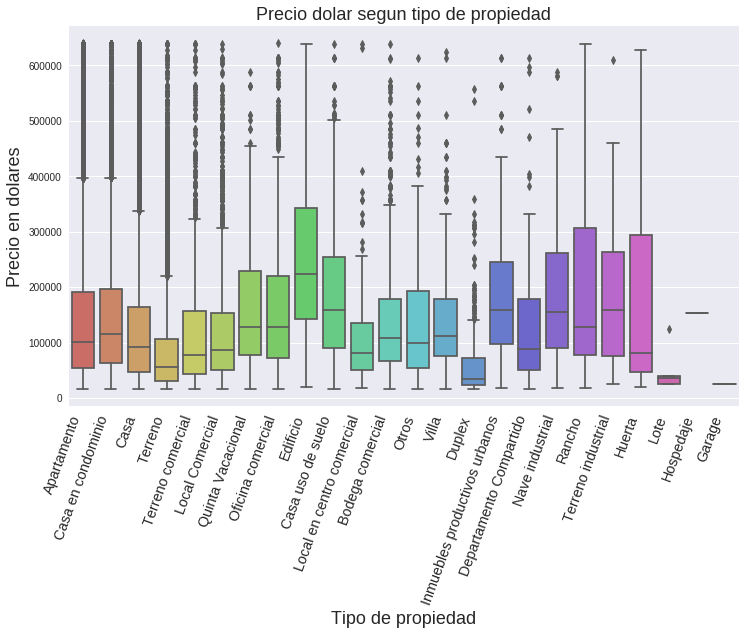

In [513]:
#Precio en dolar segun tipo de propiedad
g = sns.boxplot(x="tipo_de_propiedad", y="precio_dolar", 
                     data=df, palette="hls")
g.set_title("Precio dolar segun tipo de propiedad", fontsize=18)
g.set_xlabel("Tipo de propiedad", fontsize=18)
g.set_ylabel("Precio en dolares", fontsize=18)
plt.xticks(
    rotation=70, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

## Precio promedio de mt2 segun cantidad de ambientes en casas y edificios


In [514]:
#Propiedades con mts2 null o nan
df_filtrado = df.dropna(subset=['metros_cubiertos'])
#Me quedo con casas y edificios. Ya que un negocio sube el prom y un terreno lo bajara.
df_filtrado = df.loc[ (df['tipo_de_propiedad'] == "Casa") | (df['tipo_de_propiedad']=="Apartamento")]
df_filtrado = df_filtrado.groupby('habitaciones').agg({'precio_dolar':'mean','metros_cubiertos':'mean'})
df_filtrado['precio_mt2'] = df_filtrado['precio_dolar'].divide(df_filtrado['metros_cubiertos'])
datos = df_filtrado['precio_mt2']



Text(0, 0.5, 'PPrecio mts2')

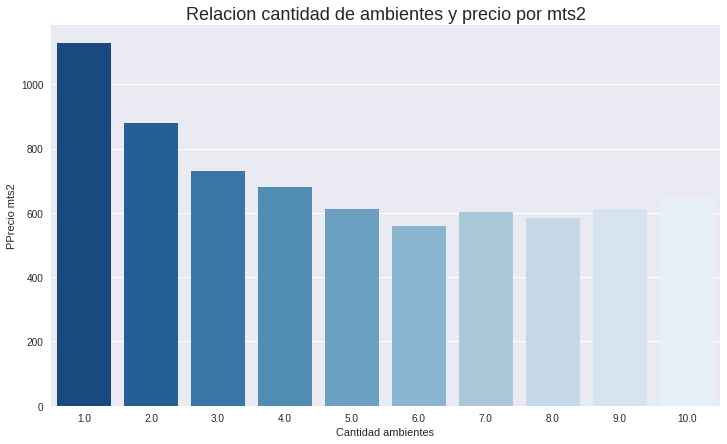

In [515]:

graf = sns.barplot(x=datos.index, y=datos.values, palette=sns.color_palette("Blues_r",10))
graf.set_title('Relacion cantidad de ambientes y precio por mts2', fontsize=18);
graf.set_xlabel('Cantidad ambientes')
graf.set_ylabel('PPrecio mts2')


# Analisis de tipo de propiedad : Locales (Via publica y shopping)

###  Histrograma pecio  de un local (Calle) segun si esta cerca shopping o no


Text(0, 0.5, 'Frecuencia')

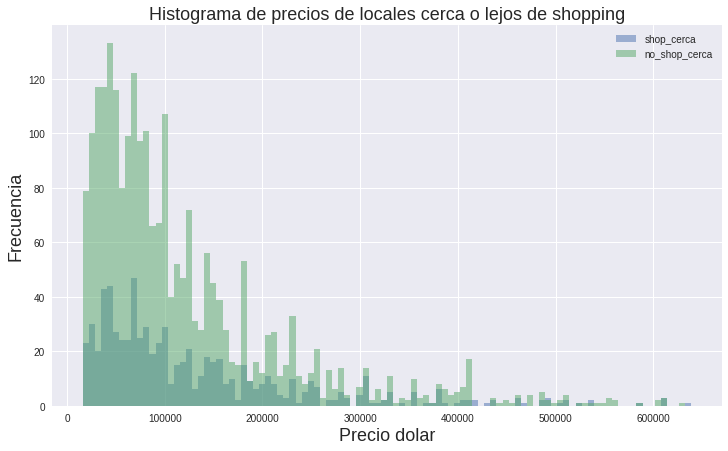

In [516]:

df3 = df

df3['shop_cerca']= df3.loc[(df['centros_comerc_cercanos']== 1.0) & (df['tipo_de_propiedad']== "Local Comercial")]['precio_dolar']
df3['no_shop_cerca'] = df3.loc[(df['centros_comerc_cercanos']== 0.0) &  (df['tipo_de_propiedad']== "Local Comercial")]['precio_dolar']                           

graf = df3[['shop_cerca','no_shop_cerca']].plot.hist(bins=100,alpha=0.5)


graf.set_title("Histograma de precios de locales cerca o lejos de shopping", fontsize=18)
graf.set_xlabel("Precio dolar",fontsize=18)
graf.set_ylabel("Frecuencia", fontsize=18)



## Ciudades con mas cantidad de locales (calle) en venta

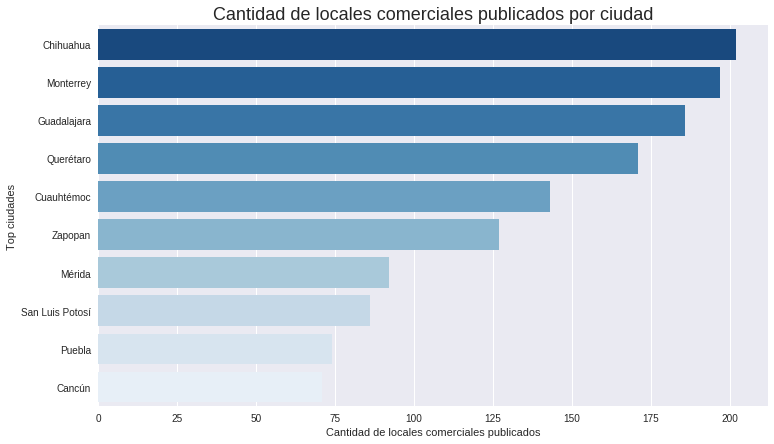

In [517]:
locales = df.loc[df['tipo_de_propiedad']=="Local Comercial"]['ciudad'].value_counts().head(10)
graf = sns.barplot(y=locales.index, x=locales.values, palette=sns.color_palette("Blues_r",10));
graf.set_title('Cantidad de locales comerciales publicados por ciudad', fontsize=18);
graf.set_xlabel('Cantidad de locales comerciales publicados');
graf.set_ylabel('Top ciudades');

## Ciudades con mas cantidad de locales (shopping) en venta

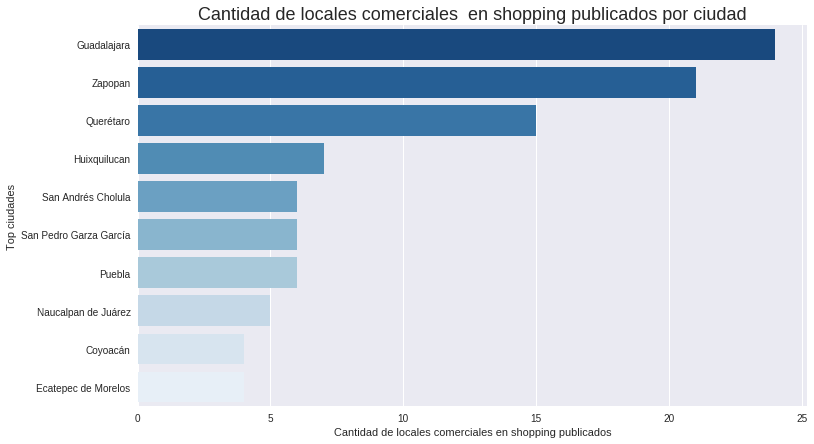

In [518]:
locales_shop = df.loc[df['tipo_de_propiedad']=="Local en centro comercial"]['ciudad'].value_counts().head(10)
graf = sns.barplot(y=locales_shop.index, x=locales_shop.values, palette=sns.color_palette("Blues_r",10));
graf.set_title('Cantidad de locales comerciales  en shopping publicados por ciudad', fontsize=18);
graf.set_xlabel('Cantidad de locales comerciales en shopping publicados');
graf.set_ylabel('Top ciudades');

## Cantidad de locales publicados por año


Text(0, 0.5, 'Cantidad de publicaciones')

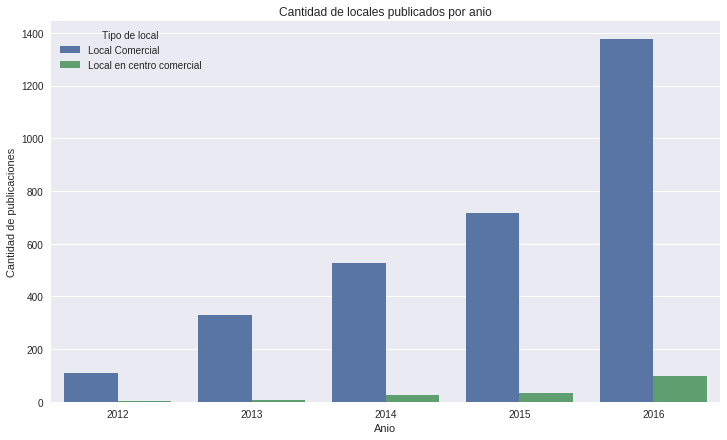

In [519]:
locales = df.loc[(df['tipo_de_propiedad']=="Local Comercial") | (df['tipo_de_propiedad']=="Local en centro comercial")]
locales = locales.groupby(['anio','tipo_de_propiedad']).agg({'anio':'count'})

locales.rename(columns= {'anio' : 'count'}, inplace= True)
locales.reset_index(inplace= True)
locales


g = sns.barplot(x="anio", y="count", hue="tipo_de_propiedad", data=locales, ci=None)
g.legend().set_title("Tipo de local")
g.set_title("Cantidad de locales publicados por anio")
g.set_xlabel("Anio")
g.set_ylabel("Cantidad de publicaciones")


Se publican muchos mas locales comerciales en comparacion a shopping, pero ambos fueron creciendo

# Un poco de analisis de fechas




## Provincias con mas publicaciones por año

Text(0, 0.5, 'Cantidad de publicaciones')

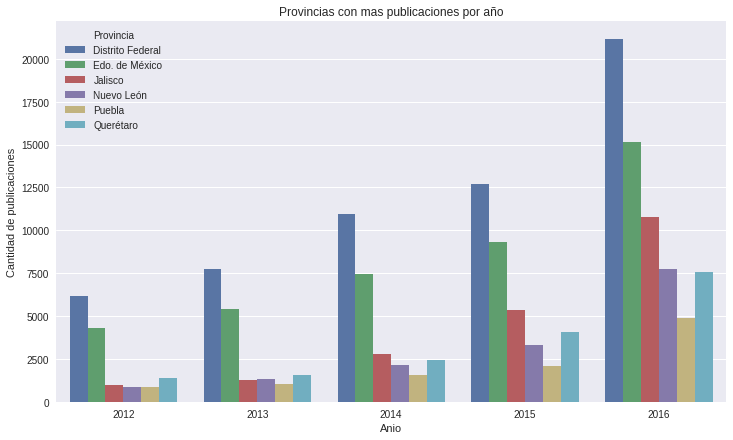

In [520]:
#Toomo ciudades con mas de 5000 publicaciones

df_filtrado = df.groupby('provincia').filter(lambda x: len(x)>10000)

provincia = df_filtrado.groupby(['anio','provincia']).agg({'ciudad':'count'})

provincia.rename(columns= {'ciudad' : 'count'}, inplace= True)
provincia.reset_index(inplace= True)



g = sns.barplot(x="anio", y="count", hue="provincia", data=provincia, ci=None)
g.legend().set_title("Provincia")
g.set_title("Provincias con mas publicaciones por año")
g.set_xlabel("Anio")
g.set_ylabel("Cantidad de publicaciones")



Distrito federal siempre tuvo mas publicaciones pero sep uede observar como Jalisco comenzo a crecer año a año

## En que mes se realizan mas publicaciones?

Text(0, 0.5, 'Cantidad de publicaciones')

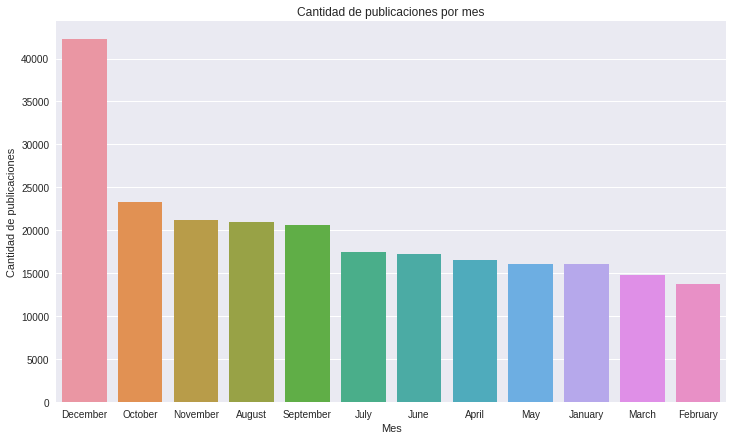

In [521]:

df['mes'] = df['fecha'].dt.month_name() 
meses = df['mes'].value_counts()

g = sns.barplot( meses.index, meses.values,  ci=None)

g.set_title("Cantidad de publicaciones por mes")
g.set_xlabel("Mes")
g.set_ylabel("Cantidad de publicaciones")


## Que esta ocurriendo en diciembre?
### Ciudades con mas publicaciones

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

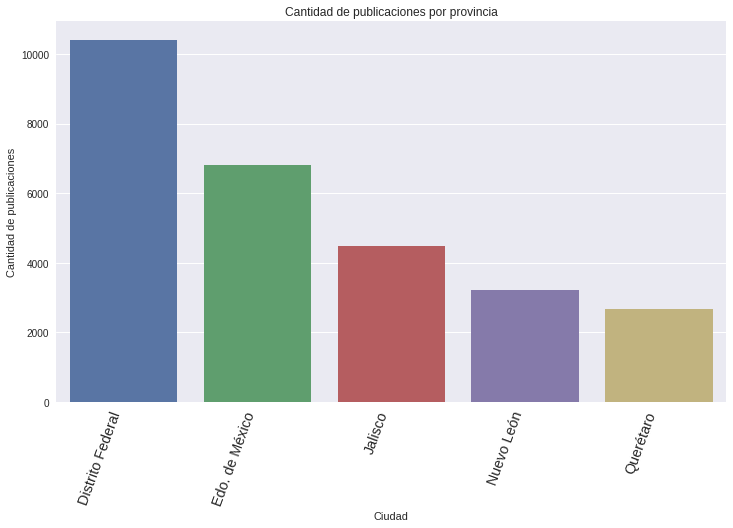

In [522]:
diciembre = df.loc[df['mes'] == "December"]
diciembre = diciembre['provincia'].value_counts()
diciembre = diciembre.head()
diciembre
g = sns.barplot( diciembre.index, diciembre.values,  ci=None)

g.set_title("Cantidad de publicaciones por provincia")
g.set_xlabel("Ciudad")
g.set_ylabel("Cantidad de publicaciones")
plt.xticks(
    rotation=70, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)


Se mantiene el comportamiento de las provincias, solo que aumentan la cantidad de publicaciones

### Que tipo de propiedades son?

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

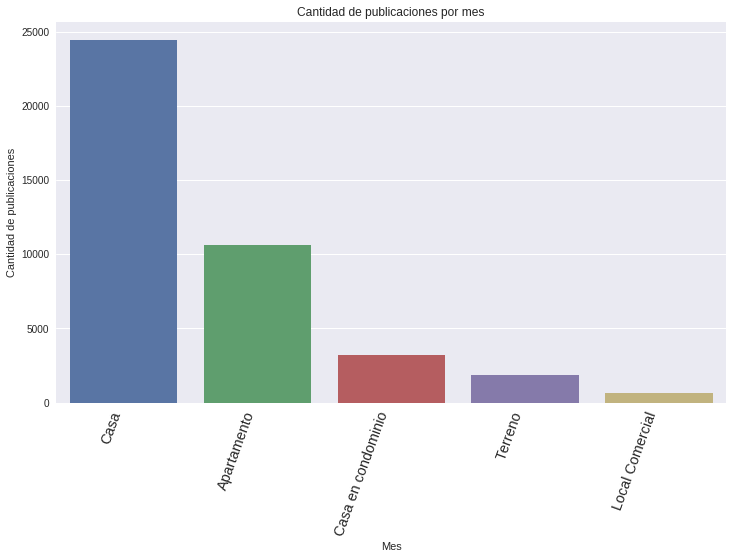

In [523]:
diciembre = df.loc[df['mes'] == "December"]
diciembre = diciembre['tipo_de_propiedad'].value_counts().head()

g = sns.barplot( diciembre.index, diciembre.values,   ci=None)

g.set_title("Cantidad de publicaciones por mes")
g.set_xlabel("Mes")
g.set_ylabel("Cantidad de publicaciones")
plt.xticks(
    rotation=70, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

## Como evolucionaron los precios en los ultimos años?
### Casas

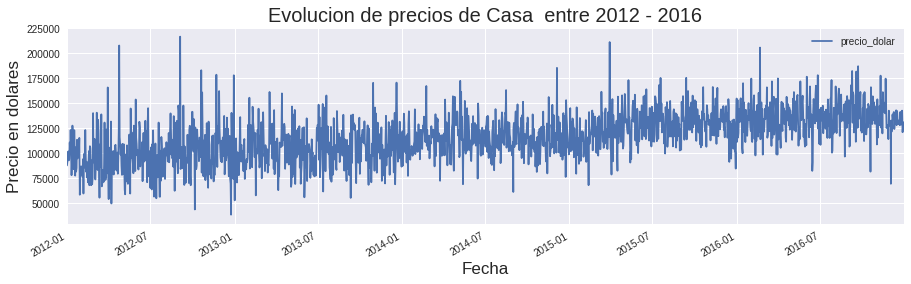

In [524]:
tiempo = df.loc[df['tipo_de_propiedad']== "Casa"]
tiempo = tiempo.groupby('fecha').agg({'precio_dolar': 'mean'})
tiempo.plot(figsize=(15,4));
plt.title('Evolucion de precios de Casa  entre 2012 - 2016',fontsize= 20)
plt.xlabel('Fecha', fontsize=17)
plt.ylabel('Precio en dolares', fontsize=17)
plt.show()

### Departamentos

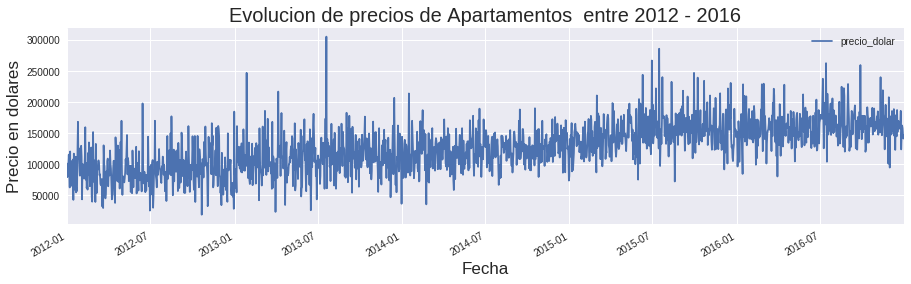

In [525]:
tiempo = df.loc[df['tipo_de_propiedad']== "Apartamento"]
tiempo = tiempo.groupby('fecha').agg({'precio_dolar': 'mean'})
tiempo.plot(figsize=(15,4));
plt.title('Evolucion de precios de Apartamentos  entre 2012 - 2016',fontsize= 20)
plt.xlabel('Fecha', fontsize=17)
plt.ylabel('Precio en dolares', fontsize=17)
plt.show()

### Locales

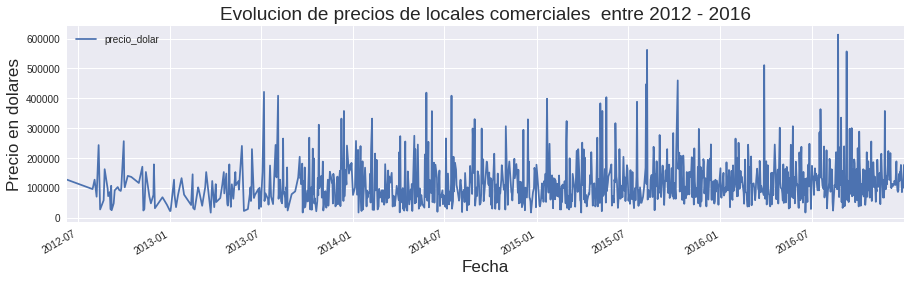

In [526]:
tiempo = df.loc[(df['tipo_de_propiedad']== "Local Comercial") | (df['tipo_de_propiedad']== "Local en centro comercial") ]
tiempo = tiempo.groupby('fecha').agg({'precio_dolar': 'mean'})
tiempo.plot(figsize=(15,4));
plt.title('Evolucion de precios de locales comerciales  entre 2012 - 2016',fontsize= 19)
plt.xlabel('Fecha', fontsize=17)
plt.ylabel('Precio en dolares', fontsize=17)
plt.show()

## Relacion entre antiguedad, precio y cantidad de habitaciones

Text(0.5, 0, 'Precio Dolar')

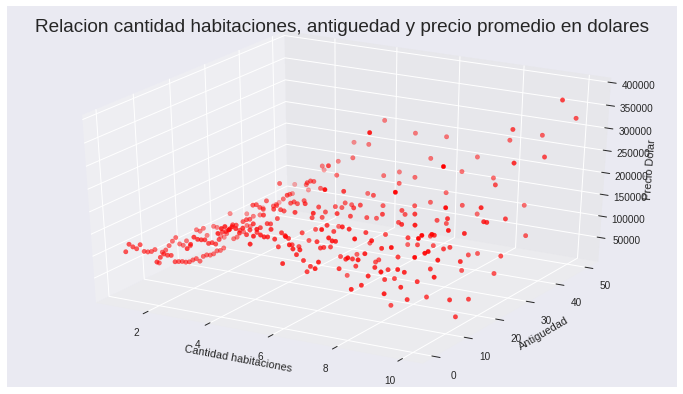

In [527]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

figsize=(20,20)

df_filtrado = df.groupby('antiguedad').filter(lambda x: len(x)>300)
#Por lo menos 300 publicaciones con esa antiguedad
df_filtrado = df_filtrado.groupby(['habitaciones','antiguedad']).agg({'precio_dolar': 'mean'})
g = df_filtrado.reset_index()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(g['habitaciones'].values, g['antiguedad'].values, g['precio_dolar'].values, c='r', marker='o')
ax.set_title("Relacion cantidad habitaciones, antiguedad y precio promedio en dolares",fontsize= 19)
ax.set_xlabel('Cantidad habitaciones')
ax.set_ylabel('Antiguedad')
ax.set_zlabel('Precio Dolar')



Text(0.5, 0, 'Precio promedio dolar')

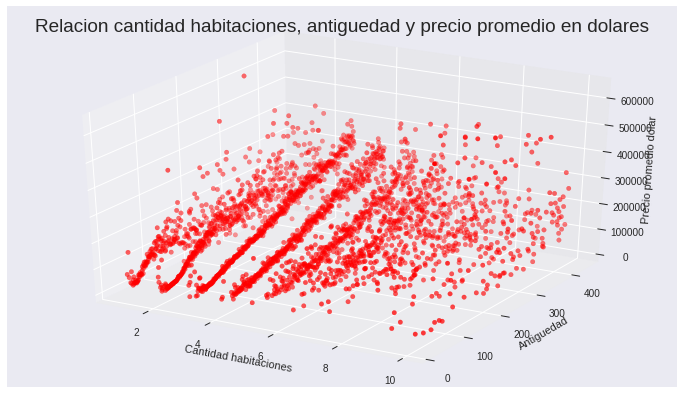

In [528]:
figsize=(20,20)

df_filtrado = df.groupby('antiguedad').filter(lambda x: len(x)>400)
#Por lo menos 400 publicaciones con esa antiguedad
df_filtrado = df_filtrado.groupby(['habitaciones','metros_cubiertos']).agg({'precio_dolar': 'mean'})
g = df_filtrado.reset_index()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(g['habitaciones'].values, g['metros_cubiertos'].values, g['precio_dolar'].values, c='r', marker='o')
ax.set_title("Relacion cantidad habitaciones, antiguedad y precio promedio en dolares",fontsize= 19)
ax.set_xlabel('Cantidad habitaciones')
ax.set_ylabel('Antiguedad')
ax.set_zlabel('Precio promedio dolar')


Se puede observar que en los casos de 3 y 4 habitaciones mientras mas antiguas son, mas dinero cuestan en promedio

## Promedio de precio de propiedades con pileta segun fecha de publicacion

Text(87.0, 0.5, 'Año de publicacion')

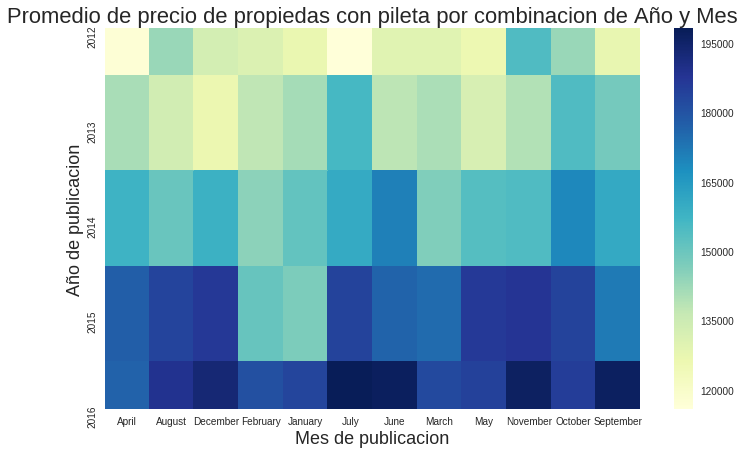

In [529]:
for_heatmap = df[df['piscina'] == 1.0].pivot_table(index='anio', columns='mes', values='precio_dolar', aggfunc='mean')
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Promedio de precio de propiedas con pileta por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de publicacion",fontsize=18)
g.set_ylabel("Año de publicacion", fontsize=18)

La época de verano en México inicia el 21 de junio y finaliza entre el 21 y 23 de septiembre. Se puede ver como en estos meses el precio de propiedades con piletas es mayor, y como estas fueron aumentando los ultimos años

## Promedio de precio de propiedades cercanas a escuelas segun fecha de publicacion

Text(87.0, 0.5, 'Año de publicacion')

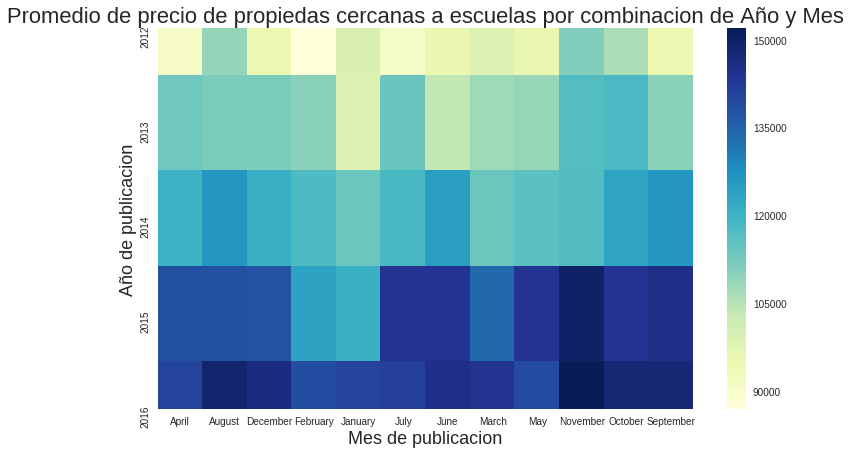

In [530]:
for_heatmap = df[df['escuelas_cercanas'] == 1.0].pivot_table(index='anio', columns='mes', values='precio_dolar', aggfunc='mean')
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Promedio de precio de propiedas cercanas a escuelas por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de publicacion",fontsize=18)
g.set_ylabel("Año de publicacion", fontsize=18)

El ciclo escolar comienza regularmente el segundo lunes de agosto y culmina el tercer o cuarto viernes de abril. Se puede apreciar como en el mes de agosto los precios de las propiedades cercanas a escuelas aumenta.
En noviembre tambien se aprecia un gran aumento (habria que averiguar por que) -> Comienza el segundo trimestre pero no hay vacaciones en el medio (raro)

### Relacion de precio de mt2 al pasar de los años (Casa, Apartamento, Local, Local Shopping)

In [531]:
ag = df.loc[(df["tipo_de_propiedad"] == "Casa") | (df["tipo_de_propiedad"] == "Apartamento") | (df["tipo_de_propiedad"] == "Local Comercial") | (df["tipo_de_propiedad"] == "Local en centro comercial")]
ag['precio_mt2'] =ag.loc[:,'precio_dolar'].divide(ag.loc[:,'metros_cubiertos'])
ag = ag.groupby(['anio','tipo_de_propiedad']).agg({'precio_mt2': 'mean'}).unstack()
ag.reset_index(inplace= True)


/home/nicolas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Cambio de precio por mt2 promedio a lo largo de los anios de Casa, Apartamento y Locales comerciales')

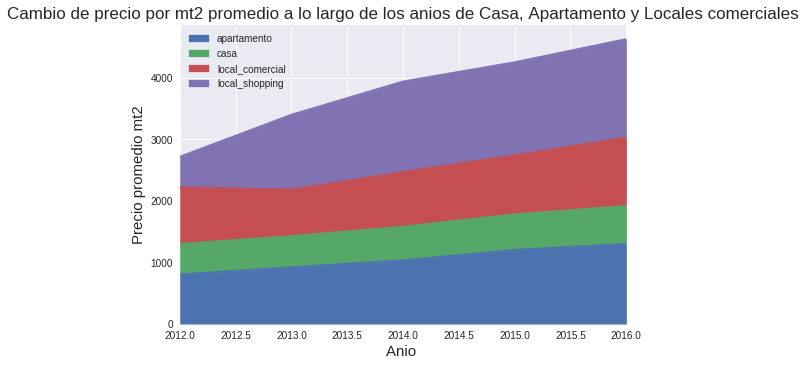

In [532]:
ag.columns = (['anio','apartamento','casa','local_comercial','local_shopping'])
ag.set_index("anio", inplace = True)

plt.style.use('seaborn')
ag.plot.area()
plt.xlabel('Anio ', fontsize=15)
plt.ylabel('Precio promedio mt2', fontsize=15)
plt.title('Cambio de precio por mt2 promedio a lo largo de los anios de Casa, Apartamento y Locales comerciales',fontsize=17)

